In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import datasets

In [3]:
mnist = datasets.load_digits()
olivetti = datasets.fetch_olivetti_faces()
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [4]:
model = DecisionTreeClassifier(random_state=15)

In [5]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [6]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
pred_train = pd.DataFrame(predict_train, columns=['pred'])
pred_train['true'] = y_train
pred_test = pd.DataFrame(predict_test, columns=['pred'])
pred_test['true'] = y_test

In [7]:
pred_train

,pred,true
0,9,9
1,0,0
2,0,0
3,3,3
4,2,2
...,...,...
1432,2,2
1433,4,4
1434,6,6
1435,8,8


In [8]:
pred_test

,pred,true
0,5,5
1,2,2
2,8,5
3,5,5
4,5,5
...,...,...
355,0,0
356,3,3
357,2,2
358,4,4


In [9]:
macro_precision_train = precision_score(y_train, predict_train, average='macro', zero_division=True)
macro_precision_test = precision_score(y_test, predict_test, average='macro', zero_division=True)
macro_recall_train = recall_score(y_train, predict_train, average='macro', zero_division=True)
macro_recall_test = recall_score(y_test, predict_test, average='macro', zero_division=True)
accuracy_train = accuracy_score(y_train, predict_train)
accuracy_test = accuracy_score(y_test, predict_test)

In [10]:
print(f'Метрика (Macro_precision) для обучающей выборки:{round(macro_precision_train, 2)}\n'
      f'Метрика (Macro_precision) для тестовой выборки:{round(macro_precision_test, 2)}\n'
      f'Метрика (Macro_recall) для обучающей выборки:{round(macro_recall_train, 2)}\n'
      f'Метрика (Macro_recall) для тестовой выборки:{round(macro_recall_test, 2)}\n'
      f'Метрика (Accuracy) для обучающей выборки:{round(accuracy_train, 2)}\n'
      f'Метрика (Accuracy) для тестовой выборки:{round(accuracy_test, 2)}\n')

Метрика (Macro_precision) для обучающей выборки:1.0
Метрика (Macro_precision) для тестовой выборки:0.87
Метрика (Macro_recall) для обучающей выборки:1.0
Метрика (Macro_recall) для тестовой выборки:0.87
Метрика (Accuracy) для обучающей выборки:1.0
Метрика (Accuracy) для тестовой выборки:0.87



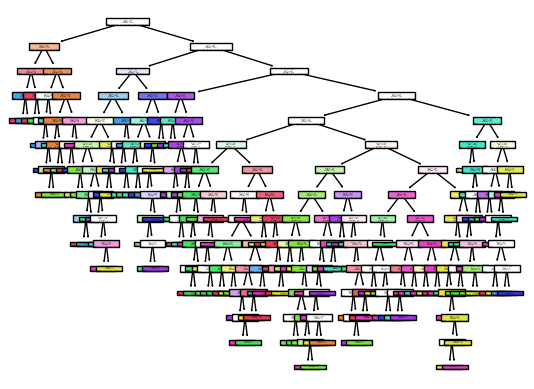

In [11]:
plot_tree(model, filled=True)
plt.show()

In [12]:
param = {'max_depth': [i for i in range(2, 20, 2)],
         'min_samples_leaf': [i for i in range(2, 20, 2)]}
gs = GridSearchCV(model, param)
gs.fit(X_train, y_train)
gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 2}

In [13]:
model_cor = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=15)

In [14]:
model_cor.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=15)

In [15]:
predict_train_cor = model_cor.predict(X_train)
predict_test_cor = model_cor.predict(X_test)
pred_train_cor = pd.DataFrame(predict_train_cor, columns=['pred'])
pred_train_cor['true'] = y_train
pred_test_cor = pd.DataFrame(predict_test_cor, columns=['pred'])
pred_test_cor['true'] = y_test

In [16]:
pred_train_cor

,pred,true
0,9,9
1,0,0
2,0,0
3,3,3
4,2,2
...,...,...
1432,2,2
1433,3,4
1434,6,6
1435,8,8


In [17]:
pred_test_cor

,pred,true
0,5,5
1,2,2
2,1,5
3,5,5
4,5,5
...,...,...
355,0,0
356,3,3
357,2,2
358,4,4


In [18]:
macro_precision_train_cor = precision_score(y_train, predict_train_cor, average='macro', zero_division=True)
macro_precision_test_cor = precision_score(y_test, predict_test_cor, average='macro', zero_division=True)
macro_recall_train_cor = recall_score(y_train, predict_train_cor, average='macro', zero_division=True)
macro_recall_test_cor = recall_score(y_test, predict_test_cor, average='macro', zero_division=True)
accuracy_train_cor = accuracy_score(y_train, predict_train_cor)
accuracy_test_cor = accuracy_score(y_test, predict_test_cor)

In [19]:
print(f'Метрика (Macro_precision) для обучающей выборки:{round(macro_precision_train_cor, 2)}\n'
      f'Метрика (Macro_precision) для тестовой выборки:{round(macro_precision_test_cor, 2)}\n'
      f'Метрика (Macro_recall) для обучающей выборки:{round(macro_recall_train_cor, 2)}\n'
      f'Метрика (Macro_recall) для тестовой выборки:{round(macro_recall_test_cor, 2)}\n'
      f'Метрика (Accuracy) для обучающей выборки:{round(accuracy_train_cor, 2)}\n'
      f'Метрика (Accuracy) для тестовой выборки:{round(accuracy_test_cor, 2)}\n')

Метрика (Macro_precision) для обучающей выборки:0.96
Метрика (Macro_precision) для тестовой выборки:0.84
Метрика (Macro_recall) для обучающей выборки:0.95
Метрика (Macro_recall) для тестовой выборки:0.85
Метрика (Accuracy) для обучающей выборки:0.95
Метрика (Accuracy) для тестовой выборки:0.84



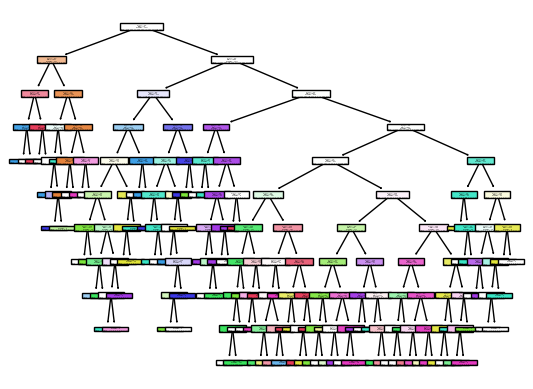

In [20]:
plot_tree(model_cor, filled=True)
plt.show()